### DATA 512: Assignment 2
### Natasha Halfin
### October 22, 2020


## Step 1: Select and Peform Analysis
I have chosen to leverage the Aggression and Personal Attacks datasets from the Wikipedia Talks datasets available here: https://figshare.com/projects/Wikipedia_Talk/16731 

First, I will import the libraries and packages necessary for this analysis.

In [27]:
#import packages
import json
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nahalf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Analysis 1: 
Analyze differences in how native English speakers vs. non-native English speakers (within the crowdworker group) label aggression in the Aggression dataset.
#### Research Question: Are non-native English speakers more or less likely to label comments as aggressive than native English speakers?
I am posing this research question due to the fact that linguistic idiosyncrasies, like jokes, slang, and sarcasm, do not always translate to non-native English speakers. This can happen even with fluent speakers. Therefore, I want to examine if there there are any discernible differences in how one crowdworker group labels vs. the other.

First, I will load the Aggression datasets, located here: https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550<br>   There are three individual datasets in the larger set: 
* aggression_annotated_comments.tsv  
* aggression_annotations.tsv  
* aggression_worker_demographics.tsv  

In [3]:
#load each dataset in a separate dataframe
df_ag_comments = pd.read_csv("Aggression/aggression_annotated_comments.tsv",sep ="\t")
df_ag_annotations = pd.read_csv("Aggression/aggression_annotations.tsv",sep ="\t")
df_ag_demo = pd.read_csv("Aggression/aggression_worker_demographics.tsv",sep ="\t")

In [4]:
df_ag_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,True,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,True,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [5]:
df_ag_annotations.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [6]:
df_ag_demo.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


Before I begin the analysis, I want to first examine the distribution of aggression labeling and the language demographics of the crowdworkers.

I will first look at the distribution of aggression labeling.

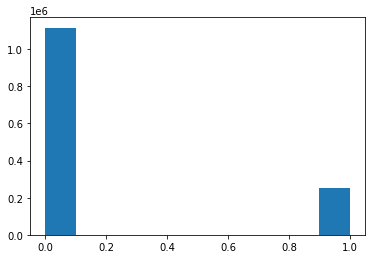

In [7]:
plt.hist(df_ag_annotations['aggression'])
plt.show()

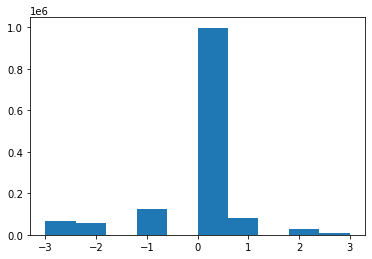

In [8]:
plt.hist(df_ag_annotations['aggression_score'])
plt.show()

It appears that the majority of comments were not considered aggressive,and most of the comments tended to receive a rating between 0 and 1, indicating a tone ranging from neutral to friendly.

Now I will look at the distribution of crowdworkers with English as their first language (0 indicating English is not their first language, and 1 indicating that English is their first language).

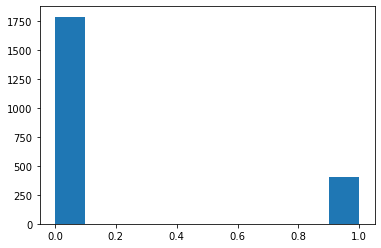

In [9]:
plt.hist(df_ag_demo['english_first_language'])
plt.show()

It appears that English is not the first language of most of the crowd-workers. The distribution is pretty heavily skewed, which may impact any potential findings.

Now that I have performed some initial exploration into the data distribution, I am ready to join the demographics dataset to the annotations set on worker_id.

In [10]:
df_ag_join = df_ag_annotations.merge(df_ag_demo,how= "inner",on = "worker_id")
df_ag_join.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


Next, I will create two separate dataframes, one for each group of crowdworkers based on their first language indicator.

In [11]:
df_ag_english = df_ag_join[df_ag_join['english_first_language']==1]
df_ag_nonenglish = df_ag_join[df_ag_join['english_first_language']==0]

In [12]:
df_ag_nonenglish.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


Now that I have filtered my data, I can visualize the distribution of aggression scores for each group.

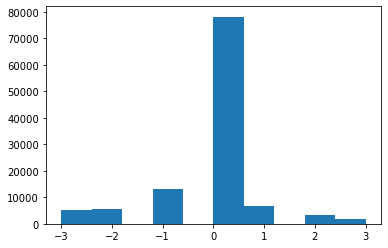

In [13]:
plt.hist(df_ag_english['aggression_score'])
plt.show()

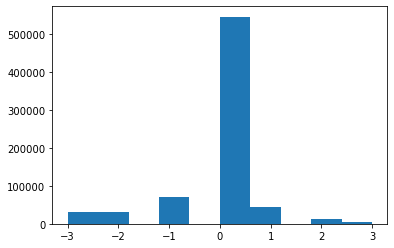

In [14]:
plt.hist(df_ag_nonenglish['aggression_score'])
plt.show()

Both groups appear to have a similar distribution of aggression scores, but let us compare each crowdworker group side-by-side. In order to do this, I will construct a dataframe containing the distribution of scores as a proportion of the total population for each crowdworker group.

In [15]:
#percentage distribution
df_perc_dist= (df_ag_english['aggression_score'].value_counts()/df_ag_english['aggression_score'].value_counts().sum())*100
df_perc_dist = pd.DataFrame(df_perc_dist)
df_perc_dist.columns = ['English']
df_perc_dist['Non-English'] = (df_ag_nonenglish['aggression_score'].value_counts()/df_ag_nonenglish['aggression_score'].value_counts().sum())*100
df_perc_dist.index.name = "Aggression Score"

In [16]:
df_perc_dist 

,English,Non-English
Aggression Score,,
0.0,68.653686,73.597489
-1.0,11.376203,9.507805
1.0,6.063030,6.001545
-2.0,5.068788,4.268367
-3.0,4.569469,4.135440
2.0,2.767351,1.841164
3.0,1.501472,0.648189


Now, I can construct a bar chart to compare the distribution of aggression score ratings between crowdworkers with English as a first language, and those whose first language was not English.

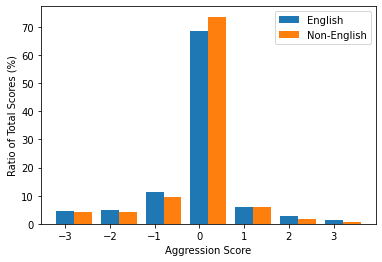

In [17]:
#plot bar chart distribution with different colors
width = 0.4
plt.bar(df_perc_dist.index,df_perc_dist['English'],width=width)
plt.bar(df_perc_dist.index+width,df_perc_dist['Non-English'],width=width)
plt.legend(['English','Non-English'])
plt.xlabel('Aggression Score')
plt.ylabel('Ratio of Total Scores (%)')
plt.show()

The proportion of aggression score ratings is relatively comparable between the crowdworkers who claim English as their first language vs. those who do not. However, non-native English speakers appear more inclined to rank a comment as neutral (score of 0), and appear slightly less likely to rank comments as friendly or aggressive. Perhaps native English speakers are more sensitive to changes in tone that can indicate a shift from neutrality. There may be some bias on the basis of a crowdworker's native language.

#### Analysis 2: Analyze terms that are most characteristic of a specific type of personal attack, i.e. quoting, recipient, third-party, or other attack.  
#### Research Question: What types of personal attacks are most common, and what kind of words are most often associated with one type vs. another?
I am posing this research question to see if personal attack types are easily distinguishable from one another based on the language used. My assumption is that any differences are likely to be nuanced and subtle. 

First, I will load the Aggression datasets, located here: https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Personal_Attacks/4054689  
There are three individual datasets in the larger set:

* attack_annotated_comments.tsv  
* attack_annotations.tsv  
* attack_worker_demographics.tsv  

In [18]:
#load each dataset in a separate dataframe
df_attack_comments = pd.read_csv("Personal_Attacks/attack_annotated_comments.tsv",sep ="\t")
df_attack_annotations = pd.read_csv("Personal_Attacks/attack_annotations.tsv",sep ="\t")
df_attack_demo = pd.read_csv("Personal_Attacks/attack_worker_demographics.tsv",sep ="\t")

In [19]:
df_attack_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


Next, I want to examine the distribution of attack types by creating dataframes filtered to each attack type and measuring the count.

In [20]:
quoting_attack_count = df_attack_annotations[df_attack_annotations['quoting_attack']==1].shape[0]
recipient_attack_count = df_attack_annotations[df_attack_annotations['recipient_attack']==1].shape[0]
third_party_attack_count = df_attack_annotations[df_attack_annotations['third_party_attack']==1].shape[0]
other_attack_count = df_attack_annotations[df_attack_annotations['other_attack']==1].shape[0]

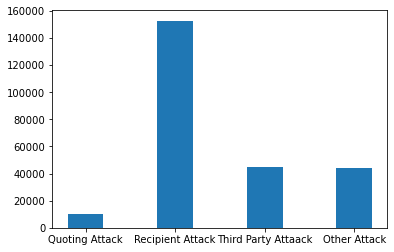

In [21]:
attack_counts = [quoting_attack_count, recipient_attack_count,third_party_attack_count,other_attack_count]
attack_types = ["Quoting Attack","Recipient Attack","Third Party Attaack","Other Attack"]
plt.bar(attack_types, attack_counts,width = 0.4)
plt.show()

Of all the records where an attack was noted, the majority were categorized as recipient attacks. This is not entirely surprising, but I am curious to see if any distinctive terms characterize the different types.

In order to examine this, I first need to join the annotations dataset to the comments dataset on the unique identifier of rev_id.

In [22]:
#join comments to annotations
df_attack_join = df_attack_annotations.merge(df_attack_comments,how= "inner",on = "rev_id")
df_attack_join.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,comment,year,logged_in,ns,sample,split
0,37675,1362,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,37675,2408,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
2,37675,1493,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
3,37675,1439,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
4,37675,170,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train


Next, I want to filter my dataset to only look at records where an attack was noted.

In [24]:
#create subset of data looking only at comments where an attack was noted
df_attack_subset = df_attack_join[df_attack_join['attack']==1]
df_attack_subset.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,comment,year,logged_in,ns,sample,split
33,89320,3341,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
35,89320,3338,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
36,89320,2101,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
37,89320,673,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
127,155243,214,0.0,0.0,0.0,1.0,1.0,NEWLINE_TOKENNEWLINE_TOKEN:If I may butt in I...,2002,True,user,random,test


Next, I want to be able to parse out individual words in each comment, so I need to clean the comment text. I will create a new column called token_comment where I plan to tokenize each word. My first step is to remove newline and tab tokens.

In [25]:
#clean comment text
df_attack_subset['token_comment'] = df_attack_subset['comment'].str.replace('NEWLINE_TOKEN','')
df_attack_subset['token_comment'] = df_attack_subset['token_comment'].str.replace('TAB_TOKEN','')
df_attack_subset['token_comment'].head()

33      Next, maybe you could work on being less cond...
35      Next, maybe you could work on being less cond...
36      Next, maybe you could work on being less cond...
37      Next, maybe you could work on being less cond...
127    :If I may butt in  I've spent the last 1/4 hou...
Name: token_comment, dtype: object

Now, I will change all the text to lowercase and remove non-alphanumeric characters. This is to enable easy comparison between distinct words and filter out noise from punctuation.

In [26]:
df_attack_subset['token_comment'] = df_attack_subset['token_comment'].str.lower()
df_attack_subset['token_comment']  = df_attack_subset['token_comment'].replace('[^a-zA-Z0-9 ]', '', regex=True)
df_attack_subset.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,comment,year,logged_in,ns,sample,split,token_comment
33,89320,3341,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,next maybe you could work on being less conde...
35,89320,3338,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,next maybe you could work on being less conde...
36,89320,2101,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,next maybe you could work on being less conde...
37,89320,673,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,next maybe you could work on being less conde...
127,155243,214,0.0,0.0,0.0,1.0,1.0,NEWLINE_TOKENNEWLINE_TOKEN:If I may butt in I...,2002,True,user,random,test,if i may butt in ive spent the last 14 hour f...


Next, I will tokenize each comment to be able to count the frequency of individual words. Please note, this may take a while to complete (~10 minutes).

In [28]:
 df_attack_subset['token_comment']= df_attack_subset.apply(lambda row: nltk.word_tokenize(row['token_comment']), axis=1)
 df_attack_subset['token_comment'].head()

33     [next, maybe, you, could, work, on, being, les...
35     [next, maybe, you, could, work, on, being, les...
36     [next, maybe, you, could, work, on, being, les...
37     [next, maybe, you, could, work, on, being, les...
127    [if, i, may, butt, in, ive, spent, the, last, ...
Name: token_comment, dtype: object

In [29]:
df_attack_subset.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,comment,year,logged_in,ns,sample,split,token_comment
33,89320,3341,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,"[next, maybe, you, could, work, on, being, les..."
35,89320,3338,0.0,1.0,0.0,0.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,"[next, maybe, you, could, work, on, being, les..."
36,89320,2101,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,"[next, maybe, you, could, work, on, being, les..."
37,89320,673,0.0,0.0,0.0,1.0,1.0,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,"[next, maybe, you, could, work, on, being, les..."
127,155243,214,0.0,0.0,0.0,1.0,1.0,NEWLINE_TOKENNEWLINE_TOKEN:If I may butt in I...,2002,True,user,random,test,"[if, i, may, butt, in, ive, spent, the, last, ..."


Next, I will create separate dataframes for each attack type.

In [30]:
#create separate dataframes for each attack type
quoting_attack = df_attack_subset[df_attack_subset['quoting_attack']==1]
recipient_attack = df_attack_subset[df_attack_subset['recipient_attack']==1]
third_party_attack = df_attack_subset[df_attack_subset['third_party_attack']==1]
other_attack = df_attack_subset[df_attack_subset['other_attack']==1]

Next, I will itereate through each dataframe in order to create a single list of words used in each attack type.

In [32]:
#quoting attack loop
quoting = []
for comment in quoting_attack['token_comment']:
    quoting.append(comment)

#recipient attack loop
recipient = []
for comment in recipient_attack['token_comment']:
    recipient.append(comment)

#recipient attack loop
third_party = []
for comment in third_party_attack['token_comment']:
    third_party.append(comment)

#other attack loop
other = []
for comment in other_attack['token_comment']:
    other.append(comment)

The above action created a list of lists, so now I need to collapse the list of lists into one list per attack type.

In [33]:
#collapse list of lists
quoting = [y for x in quoting for y in x]
recipient = [y for x in recipient for y in x]
third_party = [y for x in third_party for y in x]
other = [y for x in other for y in x]

Next, I will leverage the FreqDist function from nlkt, which calculates the frequency of distinct words in each dataset.

In [34]:
quoting_fdist = nltk.FreqDist(quoting)
recipient_fdist = nltk.FreqDist(recipient)
third_party_fdist = nltk.FreqDist(third_party)
other_fdist = nltk.FreqDist(other)

The FreqDist function produces a dictionary, so I will convert each dictionary to a dataframe and then sort the values in descending order.

In [35]:
#create dataframes for each set of attack frequency distributions and sort from highest frequency to lowest

#quoting attacks
df_quoting = pd.DataFrame(quoting_fdist.items())
df_quoting.columns = ["word","count"] 
df_quoting = df_quoting.sort_values('count',ascending = False)

#recipient attacks
df_recipient = pd.DataFrame(recipient_fdist.items())
df_recipient.columns = ["word","count"]
df_recipient = df_recipient.sort_values('count',ascending = False)

#third party attacks
df_third_party = pd.DataFrame(third_party_fdist.items())
df_third_party.columns = ["word","count"]
df_third_party = df_third_party.sort_values('count',ascending = False)

#other attacks
df_other = pd.DataFrame(other_fdist.items())
df_other.columns = ["word","count"]
df_other = df_other.sort_values('count',ascending = False)


I have commented out the below lines to avoid publishing dataframes that contain potentially offensive language. Please uncomment and run the following lines to visually inspect the list of words for each attack type sorted from highest to lowest frequency. Please note, I selected an index range in the middle since the top words were typically common prepositions, conjunctions, etc.

I visually inspected the dataframes to discover offending terms, but it may be useful to leverage libraries like profanity-check (https://pypi.org/project/profanity-check/) which can be used to more systematically classify profane language.

In [36]:
#df_quoting[20:50]

In [37]:
#df_recipient[20:50]

In [38]:
#df_third_party[20:50]

In [39]:
#df_other[20:50]

As one might expect, the highest volume of words across all attack types were common prepositions or conjunctions. I decided to look past the top 20 words in each attack type to attempt to filter out these common words. Unsurprisingly, the word "you" was the most frequent in the recipient attack list also accompanied by "my". There also seemed to be more profanities and slurs in this list than in the quoting attack. In the third-party list, "they" and "his" seemed to be more prevalent. Finally, the other attack category was the most nebulous for me to understand. Slurs on the basis on ethnicity, race, and sexual orientation seemed to be higher up on the list relative to other attack types.  
  
Overall, I would argue that it is difficult to categorize the nature of attacks. Clearly, a common theme across all of the word distribution lists was incendiary language. However, I wonder if it may be better to generalize if a comment contains attacking language. Otherwise, it seems likely that a comment could be incorrectly assigned to a specific category. This leads me to state that there may be bias in the classification of specific attack types.

## Step 2: Discuss Further Implications

#### 1. Which, if any, of these demo applications would you expect the Perspective API or any model trained on the Wikipedia Talk corpus to perform well in? Why?
I would expect the Perspective API to perform well in the Hot Topics extension because it is more generic and can capture a broader range of content. The challenge with the labels of aggression, toxicity, and personal attack, is that these are very specific categories that may not be well defined and could in fact be overlapping. Additionally, the Engadget article that describes the Perspective API (https://www.engadget.com/2017-09-01-google-perspective-comment-ranking-system.html?guccounter=1) shows that simply identifyng as a member of a marginalized group results in a higher toxicity score. While I could see this type of comment leading to a heated discussion, it is not toxic in and of itself. Therefore, the broader scope of the Topics extension is well suited to the Perpsective API.

#### 2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?
I think the Perspective API will perform poorly in the Behave! extension because it is intended for YouTube, Reddit, and Twitter, which have user bases and conversations that vary greatly from the Wikipedia Talk comments. If anything, I would assume that there are higher levels of aggression, toxicity, and personal attacks in these platforms compared to Wikipedia, and that the Perspective API may not be robust enough to detect the additional forms of hostility. The Perspective API should probably be retrained with at least some data from YouTube/Reddit/Twitter or similar social networks before being applied in these settings.

#### 3. What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?
I would expect the Perspective API to perform poorly on an app like Instragram, where most content is based on photos, and hostile language is often rooted in criticizing people's actions in photos or their appearance. In contrast, the Wikipedia Talk corpus is based on comments from editors who are compiling articles on various topics; the heated discussions are more likely to focus on intellectual/political differences, rather than body-shaming (which is common on Instagram). Therefore, the Perspective API would likely perform poorly in this context because it did not have sufficient data of this type to train on.